In [1]:
import datetime
import csv
import pandas as pd
from IPython.display import Image


In [2]:
unprocessed = pd.read_csv("schipsdataset.csv",sep=';')

In [3]:
unprocessed.head(10)

,VesselAISKey,AISTrajectPositionTimeStamp,AISTrajectPositionLongitude,AISTrajectPositionLatitude,AISTrajectPositionCourseOverGround,"AISTrajectPositionSpeedOverGround,,,,"
0,126,2018-01-10 08:53:58.867,"3,212845087","51,31682968",0,"0,,"
1,126,2018-01-10 09:26:58.290,"3,212833405","51,31681824",0,"0,,"
2,126,2018-01-10 09:56:59.190,"3,212833405","51,31671524",0,"0,,"
3,126,2018-01-10 10:29:58.157,"3,212815046","51,31678009",0,"0,,"
4,126,2018-01-10 11:02:58.967,"3,212668419","51,31679153",0,"0,,"
5,126,2018-01-10 11:32:59.587,"3,212796688","51,31678391",0,"0,,"
6,126,2018-01-10 12:05:59.207,"3,212899923","51,3168335",0,"0,,"
7,126,2018-01-10 12:38:59.157,"3,212896585","51,31676483",0,"0,,"
8,126,2018-01-10 13:08:59.920,"3,212785006","51,31679916",0,"0,,"
9,126,2018-01-10 13:41:58.510,"3,212863445","51,31678009",0,"0,,"


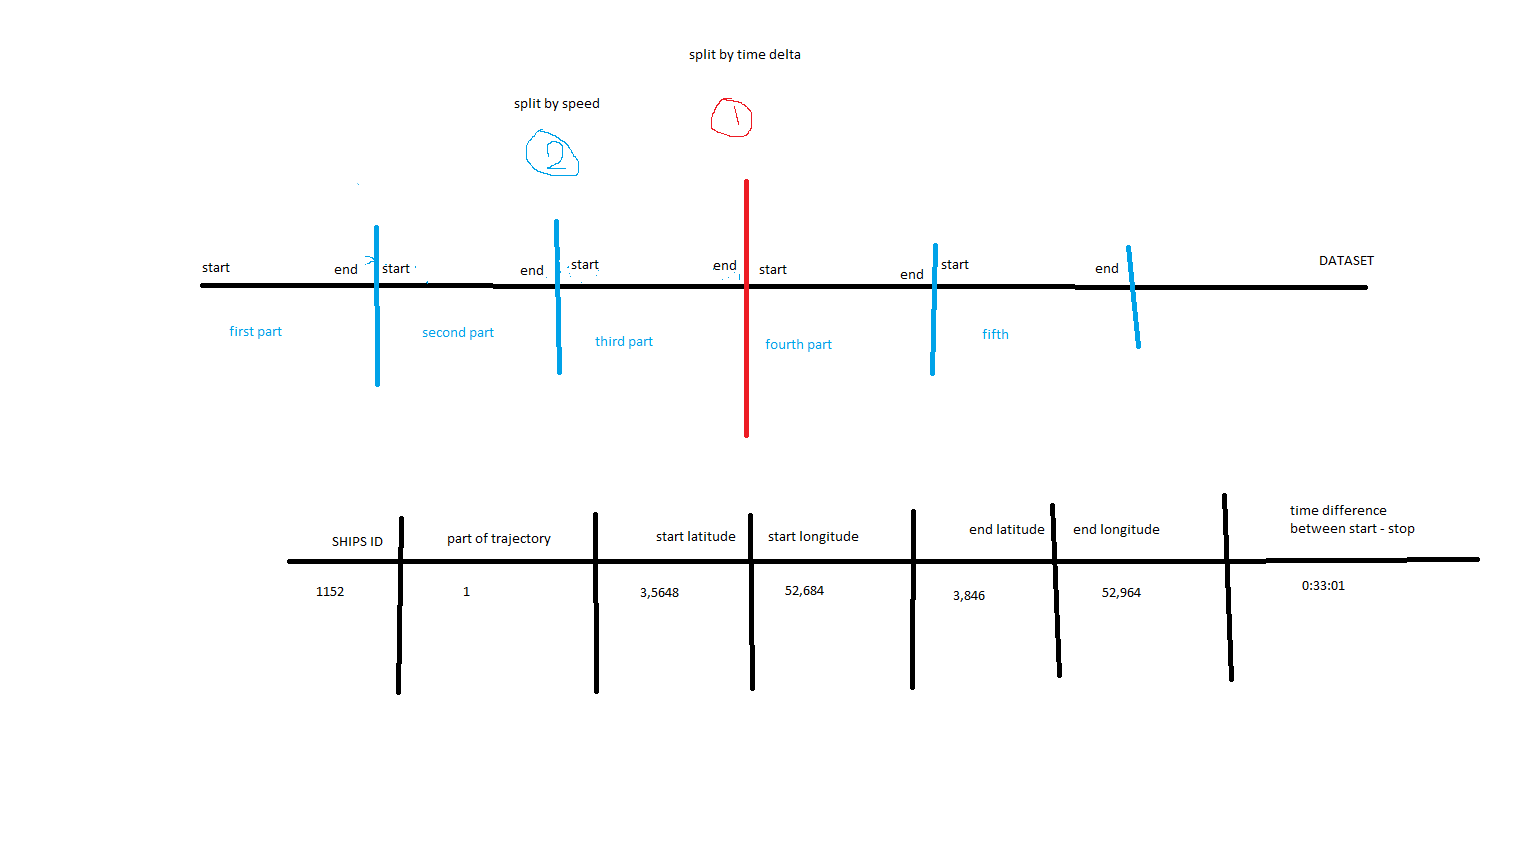

In [4]:
Image(filename='preprocessing.png')

In [5]:
timedelta = 500000 #130uur
speedDelta = 2     #2 meter per seconde

In [6]:
f = open("schipsdataset.csv")

In [7]:
fileData = f.readlines()
List = []
outputList = []

In [8]:
def getTime(tuple):
    return (tuple[0]*60) + tuple[1]

In [9]:
data = []
for d in fileData:
    temp = d.replace(";",",")
    data.append(temp.split(","))

In [10]:
List.append(data[1])

In [12]:

def splitList(List):
    if(len(List)<1):
        return 0
    newList = []
    newList.append(List[0])
    route = 1
    for i in range(1,len(List)):
        
        if(len(List[i]) > 7):
            if((not (List[i][7]=="") )and (not(newList[len(newList)-1][7] == "") )):
                if((not (List[i][7]=="NULL") )and (not(newList[len(newList)-1][7] == "NULL") )):
                    if(not (List[i][7].rstrip("\n") is None)):
                        if(not (newList[len(newList)-1][7].rstrip("\n") is None)):
                                speedDiff = int(List[i][7]) - int(newList[len(newList)-1][7])
                                if(speedDiff < speedDelta):
                                    newList.append(List[i])
                                else:
                                    d = []
                                    d.append(newList[0][0])
                                    d.append(route)
                                    route = route + 1
                                    d.append(newList[0][2] + "." +newList[0][3])
                                    d.append(newList[0][4] + "." +newList[0][5])
                                    
                                    d.append(newList[len(newList)-1][2] + "."+newList[len(newList)-1][3])
                                    d.append(newList[len(newList)-1][4] + "."+newList[len(newList)-1][5])
                                                                        
                                    
                                    time1 = datetime.datetime.strptime(newList[0][1], '%Y-%m-%d %H:%M:%S.%f')
                                    time2 = datetime.datetime.strptime(newList[len(newList)-1][1], '%Y-%m-%d %H:%M:%S.%f')
                                    timeDiff = time2 - time1
                                    tup = divmod(timeDiff.total_seconds(), 60)    
                                    d.append(getTime(tup))
                                    print(d)
                                    outputList.append(d)
                                    newList = []
                                    newList.append(List[i])

In [13]:

for i in range(2,len(data)):
    time1 = datetime.datetime.strptime(List[len(List)-1][1], '%Y-%m-%d %H:%M:%S.%f')
    time2 = datetime.datetime.strptime(data[i][1], '%Y-%m-%d %H:%M:%S.%f')
    timeDiff = time2 - time1
    tup = divmod(timeDiff.total_seconds(), 60)
    if(getTime(tup) < timedelta):
        if(len(data[i])>7):
            List.append(data[i])
    else:
        splitList(List)
        List = []
        List.append(data[i])

, '51.61103821', 377.563]
['280795', 323, '4.02635479', '51.60642242', '3.960885048', '51.58532333', 1268.727]
['280795', 324, '3.959866762', '51.57603455', '3.964119911', '51.56712341', 180.22]
['280795', 325, '3.970838308', '51.55858231', '3.985693216', '51.54280853', 347.77]
['280795', 326, '3.994509935', '51.53543472', '4.014573097', '51.52245712', 395.333]
['280795', 327, '4.013569832', '51.51315689', '4.003908157', '51.49580765', 449.316]
['280795', 328, '4.004273415', '51.48659515', '4.004273415', '51.48659515', 0.0]
['280795', 329, '4.004994869', '51.47745895', '4.009500027', '51.4593277', 802.256]
['280795', 330, '4.013106823', '51.44947433', '4.015553474', '51.44501495', 3611.164]
['280795', 331, '4.01553154', '51.44501495', '4.015558243', '51.44501495', 1809.373]
['280795', 332, '4.00481987', '51.43860245', '3.976993322', '51.43320847', 376.063]
['280795', 333, '3.96671176', '51.42663956', '3.960050106', '51.4185257', 190.733]
['280795', 334, '3.956241608', '51.40956497', '3

In [14]:
with open('output.csv', mode='w') as output_file:
    output_writer = csv.writer(output_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for data in outputList:        
        output_writer.writerow(data)

In [15]:
sdata = pd.read_csv("output.csv",sep=',',names=["shipid","routeid","startLongitude","startLatitude","endlongitude","endlatitude","timedelta"])

In [16]:
sdata=sdata[sdata.timedelta!=0]

In [17]:
sdata=sdata[sdata.timedelta>0]

In [18]:
sdata.head(10)

,shipid,routeid,startLongitude,startLatitude,endlongitude,endlatitude,timedelta
0,126,1,3.212845,51.316830,3.212863,51.316753,92879.550
3,224,4,3.763512,52.018326,3.825448,52.001163,1086.630
4,224,5,3.840682,52.001465,3.858673,52.001762,159.390
5,224,6,3.873283,52.001999,3.889362,52.002422,141.986
11,224,3,3.997785,51.997833,4.012037,51.995899,137.470
12,224,4,4.028650,51.992615,4.046670,51.988098,193.390
13,224,5,4.062913,51.983406,4.117155,51.967014,714.003
19,224,1,3.976485,52.028015,3.964532,52.035114,138.660
20,224,2,3.952788,52.040504,3.924915,52.048660,256.190
23,224,3,3.795045,52.014248,3.812403,52.011993,145.626


In [19]:
sdata.to_csv(r'processeddata.csv',sep='\t', index=False)